In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*.jpg')))

0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 8s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3753920123_c7ebc18ee3.jpg'),
 PosixPath('datasets/flower_photos/roses/6570546331_ffb9dab0bf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4279989256_9a48c0d194_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4243078361_7b92a932cd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2491600761_7e9d6776e8_m.jpg')]

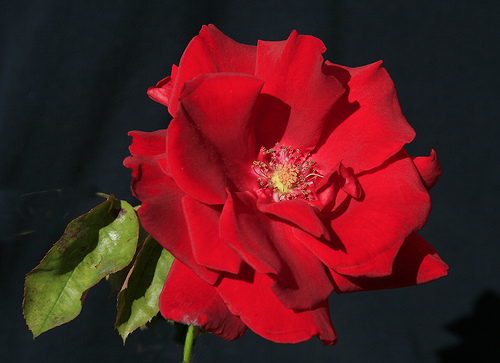

In [ ]:
PIL.Image.open(str(roses[0]))

In [ ]:
flower_img_dir = {
    'rose' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflower' : list(data_dir.glob('sunflowers/*')),
    'tulip' : list(data_dir.glob('tulips/*'))
}

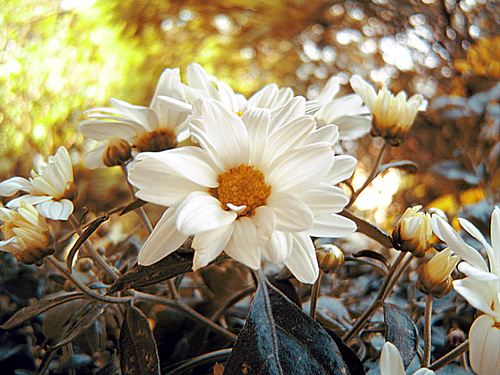

In [ ]:
PIL.Image.open(str(flower_img_dir['daisy'][0]))

In [55]:
flowers_labels_dict = {
    'rose' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflower' : 3,
    'tulip' : 4
}

In [ ]:
flower_img_dir['daisy'][0]

PosixPath('datasets/flower_photos/daisy/54377391_15648e8d18.jpg')

array([[[128, 227, 225],
        [134, 237, 234],
        [128, 236, 230],
        ...,
        [ 72,  97, 129],
        [105, 113, 120],
        [ 68, 109, 118]],

       [[124, 238, 231],
        [134, 248, 241],
        [126, 241, 232],
        ...,
        [ 54,  71,  97],
        [ 90,  93, 121],
        [ 48,  90, 133]],

       [[112, 236, 224],
        [109, 233, 221],
        [108, 230, 220],
        ...,
        [ 41,  72,  81],
        [ 72,  86, 109],
        [ 46,  70, 130]],

       ...,

       [[  8,   0,   0],
        [  8,   0,   0],
        [  8,   0,   0],
        ...,
        [115, 130, 149],
        [115, 131, 147],
        [ 99, 121, 133]],

       [[ 10,   0,   0],
        [ 10,   0,   0],
        [ 10,   0,   0],
        ...,
        [117, 126, 140],
        [114, 127, 143],
        [100, 121, 136]],

       [[ 12,   0,   0],
        [ 12,   0,   0],
        [ 10,   0,   0],
        ...,
        [118, 123, 138],
        [111, 121, 139],
        [ 97, 115, 138]]], dtype=uint8)
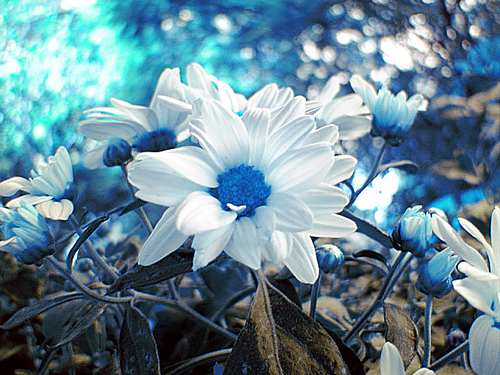

In [ ]:
img = cv2.imread(str(flower_img_dir['daisy'][0]))
img

array([[[133, 242, 237],
        [ 84, 239, 225],
        [ 54, 221, 208],
        ...,
        [ 91, 115, 139],
        [ 81,  88, 106],
        [ 92, 102, 121]],

       [[108, 223, 213],
        [ 97, 233, 224],
        [ 86, 222, 214],
        ...,
        [ 67,  71,  75],
        [ 84,  77,  87],
        [ 68,  79, 100]],

       [[144, 225, 222],
        [110, 223, 219],
        [121, 226, 225],
        ...,
        [ 86,  83,  89],
        [ 80,  84,  74],
        [ 68,  73,  96]],

       ...,

       [[  9,   0,   0],
        [ 10,   0,   0],
        [ 10,   0,   0],
        ...,
        [105, 123, 145],
        [103, 130, 146],
        [115, 131, 144]],

       [[  8,   0,   0],
        [  8,   0,   0],
        [  8,   0,   0],
        ...,
        [107, 120, 133],
        [104, 126, 144],
        [113, 129, 146]],

       [[ 11,   0,   0],
        [  9,   0,   0],
        [  9,   0,   0],
        ...,
        [ 98, 117, 135],
        [ 99, 121, 138],
        [111, 123, 141]]], dtype=uint8)
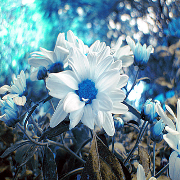

In [ ]:
cv2.resize(img, (180,180))

In [56]:
x, y = [], []

for flower_name, dir in flower_img_dir.items():
  for image in dir:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [62]:
x = np.array(x) / 255
y = np.array(y)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 ,random_state=0)

In [66]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 82s 940ms/step - loss: 1.2685 - accuracy: 0.4648
Epoch 2/30
86/86 [==============================] - 77s 895ms/step - loss: 0.9743 - accuracy: 0.6217
Epoch 3/30
86/86 [==============================] - 78s 904ms/step - loss: 0.8074 - accuracy: 0.6879
Epoch 4/30
86/86 [==============================] - 78s 907ms/step - loss: 0.6505 - accuracy: 0.7562
Epoch 5/30
86/86 [==============================] - 79s 918ms/step - loss: 0.4610 - accuracy: 0.8310
Epoch 6/30
86/86 [==============================] - 79s 921ms/step - loss: 0.2513 - accuracy: 0.9164
Epoch 7/30
86/86 [==============================] - 80s 927ms/step - loss: 0.1556 - accuracy: 0.9484
Epoch 8/30
86/86 [==============================] - 85s 988ms/step - loss: 0.0976 - accuracy: 0.9720
Epoch 9/30
86/86 [==============================] - 79s 915ms/step - loss: 0.0416 - accuracy: 0.9909
Epoch 10/30
86/86 [==============================] - 79s 926ms/step - loss: 0.0274 - accura

In [67]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 12s 412ms/step - loss: 2.6966 - accuracy: 0.6776


[2.6965861320495605, 0.6775599122047424]

In [69]:
prediction = model.predict(x_test)

29/29 [==============================] - 9s 303ms/step


In [71]:
score = tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6302932e-19, 1.0000000e+00, 7.8817302e-17, 2.3094394e-24,
       1.4265634e-19], dtype=float32)>

In [72]:
np.argmax(score)

1

In [73]:
y_test[0]

1

Data Augmentation & removing overfitting

In [75]:
data_augmentation = keras.Sequential([
        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
])

In [78]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
86/86 [==============================] - 100s 1s/step - loss: 1.4376 - accuracy: 0.3746
Epoch 2/20
86/86 [==============================] - 95s 1s/step - loss: 1.1247 - accuracy: 0.5374
Epoch 3/20
86/86 [==============================] - 96s 1s/step - loss: 1.0390 - accuracy: 0.6010
Epoch 4/20
86/86 [==============================] - 95s 1s/step - loss: 0.9792 - accuracy: 0.6210
Epoch 5/20
86/86 [==============================] - 95s 1s/step - loss: 0.8989 - accuracy: 0.6468
Epoch 6/20
86/86 [==============================] - 98s 1s/step - loss: 0.8507 - accuracy: 0.6726
Epoch 7/20
86/86 [==============================] - 101s 1s/step - loss: 0.7910 - accuracy: 0.6962
Epoch 8/20
86/86 [==============================] - 96s 1s/step - loss: 0.7656 - accuracy: 0.7060
Epoch 9/20
86/86 [==============================] - 96s 1s/step - loss: 0.7435 - accuracy: 0.7144
Epoch 10/20
86/86 [==============================] - 97s 1s/step - loss: 0.7049 - accuracy: 0.7344
Epoch 11/20
86/86